# IMPORTS

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics.SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist, euclidean


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *
from TCR_feature_generation.SubsamplingFunctions import *

import os
from Utils import cacheOnDisk
from SegalQueue.qp import qp,fakeqp
from addloglevels import sethandlers

#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done
done
done
stop
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


end of function!!!


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'25082018'

# ss5000 rep2

## function1 - subsample and find relevant phenotypes

In [ ]:
ss=5000
repeat=2
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

In [ ]:
sharingMatrix_PNP530_ss5000_rep2_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary

## function2 - generate matched cohorts and validate by comparing phenotypes
try to get as many samples as possible!

### prepare phenotype DFs:

replace all ss and rep information!!!

In [ ]:
# get full phenotype DFs for PNP and Cardio:
f1='%s/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx' %MyPath
PNP530_phen_new_dummies=pd.read_excel(f1).set_index('BD')

f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies.xlsx' %MyPath
Cardio126_phen_new_dummies=pd.read_excel(f2).set_index('BD')

#filter for ss5000 samples and save:
folder='%s/TCR_real_data/PNP530_SubSampled5000data_rep2/SamplesForAnalysis_corrected' %MyPath
PNP530ss5000sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

PNP530ss5000_phen_new_dummies=PNP530_phen_new_dummies.loc[PNP530ss5000sampleList,:]

f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss5000_phen_new_dummies.xlsx' %MyPath
PNP530ss5000_phen_new_dummies.to_excel(f3)


folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled5000data_rep2/SamplesForAnalysis_corrected' %MyPath
Cardio126ss5000sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

Cardio126ss5000_phen_new_dummies=Cardio126_phen_new_dummies.loc[Cardio126ss5000sampleList,:]

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss5000_phen_new_dummies.xlsx' %MyPath
Cardio126ss5000_phen_new_dummies.to_excel(f4)


### run matching function:

********** run several times to reach optimal matched cohorts, and then clean folder from unwanted sample lists and other stuff **********

**********use results for next function **************

In [ ]:
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss5000_phen_new_dummies.xlsx' %MyPath
PNP530ss5000_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss5000_phen_new_dummies.xlsx' %MyPath
Cardio126ss5000_phen_new_dummies=pd.read_excel(f4).set_index('BD')

phenotypeList=[('Gender_Male','identity',None,True),('Age','delta',7,True),('Smoking_Past','identity',None,True),('Smoking_Yes','identity',None,True),
               ('BMI','delta',4,False),('eGFR_CKD-EPI_new','delta',None,False),('WBC','delta',2,False)]
columnsToUse=[x[0] for x in phenotypeList]
restrictedPhenotypes=[x[0] for x in phenotypeList if x[3]==True]
print restrictedPhenotypes

cohort1phenotypeDF=Cardio126ss5000_phen_new_dummies
cohort1name='Cardio126ss5000'
cohort2phenotypeDF=PNP530ss5000_phen_new_dummies
cohort2name='PNP530ss5000'

folderToSaveLists='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss5000rep2' %MyPath
random_state=4
               
matchedCardio5000samples,matchedPNP5000samples=gen_matched_cohorts_by_phenotypes(cohort1phenotypeDF,cohort1name,cohort2phenotypeDF,cohort2name, 
                                      phenotypeList, columnsToUse,restrictedPhenotypes,folderToSaveLists,random_state)
                
#phenotypeList is a list of tuples, in each tuple the first item is the phenotype name (string)the second is the conditionType-'identity' or 'delta',
#the third is the delta (int) or None and the forth is isStopingCrit (True/False)

## function 3- copying files, comparing TCR features, sequences and sequence sharing patterns

****** change below thesample list file namesaccording to the results of the former function results *********

****** play with percSharedCom, identityColumnForPie ******** 

******* investigate all result files and figures *********

In [ ]:
ss=5000
repeat=2

datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)

PNPListFile='%s/PNP530ss5000_samples_matchedTo_Cardio126ss5000_n91_resByGenderMaleAgeSmokingPastSmokingYes_rs4' %datasetFolder
with open(PNPListFile,'rb') as fp:
    PNPmatchedSampleList=pickle.load(fp)

CardioListFile='%s/Cardio126ss5000_samples_matchedTo_PNP530ss5000_n91_resByGenderMaleAgeSmokingPastSmokingYes_rs4' %datasetFolder
with open(CardioListFile,'rb') as fp:
    CardioMatchedSampleList=pickle.load(fp)
    
delFolderFirst=False
copySamples=False

compareFeatures=False

genOrigComTCRdf=False
genComTCRdf=True
n_comp=10
percSharedCom=2

compareSharing=True
genSepTCRdf=False
nSharedMin=2
identityColumnForPie='Epitopespecies_VDJDB' #'Epitopespecies_VDJDB'/'Pathology_McPAS'

FeatureMeanSummary_all_dataSets=compareTCRforMatchedCohorts(ss,repeat,PNPmatchedSampleList,CardioMatchedSampleList,
                            copySamples,compareFeatures,compareSharing, genSepTCRdf,nSharedMin,delFolderFirst,
                            genOrigComTCRdf,genComTCRdf,n_comp,percSharedCom,identityColumnForPie)




## generate TCRfeatureDF without completely correlated columns

In [ ]:
filterFeaturesByCorr=1

ss=5000
repeat=2
genFeatureDF=True
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%s%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)
sampleListName=datasetName


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,sampleListName=sampleListName,genFeatureDF=genFeatureDF)


# ss9000 rep2

## function1 - subsample and find relevant phenotypes

In [ ]:
ss=9000
repeat=2
ssPNP=True #True/False. subsample only if not exist
ssCardio=True #True/False. subsample only if not exist
genTCRdfPNP=True #True/False. 
genTCRdfCardio=True #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

## function2 - generate matched cohorts and validate by comparing phenotypes
try to get as many samples as possible!

### prepare phenotype DFs:

replace all ss and rep information!!!

In [ ]:
# get full phenotype DFs for PNP and Cardio:
f1='%s/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx' %MyPath
PNP530_phen_new_dummies=pd.read_excel(f1).set_index('BD')

f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies.xlsx' %MyPath
Cardio126_phen_new_dummies=pd.read_excel(f2).set_index('BD')

#filter for ss9000 samples and save:
folder='%s/TCR_real_data/PNP530_SubSampled9000data_rep2/SamplesForAnalysis_corrected' %MyPath
PNP530ss9000sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

PNP530ss9000_phen_new_dummies=PNP530_phen_new_dummies.loc[PNP530ss9000sampleList,:]

f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss9000_phen_new_dummies.xlsx' %MyPath
PNP530ss9000_phen_new_dummies.to_excel(f3)


folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep2/SamplesForAnalysis_corrected' %MyPath
Cardio126ss9000sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

Cardio126ss9000_phen_new_dummies=Cardio126_phen_new_dummies.loc[Cardio126ss9000sampleList,:]

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss9000_phen_new_dummies.xlsx' %MyPath
Cardio126ss9000_phen_new_dummies.to_excel(f4)


### run matching function:

********** run several times to reach optimal matched cohorts, and then clean folder from unwanted sample lists and other stuff **********

**********use results for next function **************

In [ ]:
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss9000_phen_new_dummies.xlsx' %MyPath
PNP530ss9000_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss9000_phen_new_dummies.xlsx' %MyPath
Cardio126ss9000_phen_new_dummies=pd.read_excel(f4).set_index('BD')

phenotypeList=[('Gender_Male','identity',None,True),('Age','delta',8,True),('Smoking_Past','identity',None,True),('Smoking_Yes','identity',None,True),
               ('BMI','delta',4,False),('eGFR_CKD-EPI_new','delta',None,False),('WBC','delta',2,False)]
columnsToUse=[x[0] for x in phenotypeList]
restrictedPhenotypes=[x[0] for x in phenotypeList if x[3]==True]
print restrictedPhenotypes

cohort1phenotypeDF=Cardio126ss9000_phen_new_dummies
cohort1name='Cardio126ss9000'
cohort2phenotypeDF=PNP530ss9000_phen_new_dummies
cohort2name='PNP530ss9000'

folderToSaveLists='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss9000rep2' %MyPath
random_state=2
               
matchedCardio9000samples,matchedPNP9000samples=gen_matched_cohorts_by_phenotypes(cohort1phenotypeDF,cohort1name,cohort2phenotypeDF,cohort2name, 
                                      phenotypeList, columnsToUse,restrictedPhenotypes,folderToSaveLists,random_state)
                
#phenotypeList is a list of tuples, in each tuple the first item is the phenotype name (string)the second is the conditionType-'identity' or 'delta',
#the third is the delta (int) or None and the forth is isStopingCrit (True/False)

## function 3- copying files, comparing TCR features, sequences and sequence sharing patterns

****** change below thesample list file namesaccording to the results of the former function results *********

****** play with percSharedCom, identityColumnForPie ******** 

******* investigate all result files and figures *********

In [ ]:
ss=9000
repeat=2

datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)

PNPListFile='%s/PNP530ss9000_samples_matchedTo_Cardio126ss9000_n82_resByGenderMaleAgeSmokingPastSmokingYes_rs2' %datasetFolder
with open(PNPListFile,'rb') as fp:
    PNPmatchedSampleList=pickle.load(fp)

CardioListFile='%s/Cardio126ss9000_samples_matchedTo_PNP530ss9000_n82_resByGenderMaleAgeSmokingPastSmokingYes_rs2' %datasetFolder
with open(CardioListFile,'rb') as fp:
    CardioMatchedSampleList=pickle.load(fp)
    
delFolderFirst=False
copySamples=False

compareFeatures=False

genOrigComTCRdf=False
genComTCRdf=False
n_comp=10
percSharedCom=10

compareSharing=True
genSepTCRdf=False
nSharedMin=2
identityColumnForPie='Epitopespecies_VDJDB' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True

FeatureMeanSummary_all_dataSets=compareTCRforMatchedCohorts(ss,repeat,PNPmatchedSampleList,CardioMatchedSampleList,
                            copySamples,compareFeatures,compareSharing, genSepTCRdf,nSharedMin,delFolderFirst,
                            genOrigComTCRdf,genComTCRdf,n_comp,percSharedCom,identityColumnForPie,dropnaFromIdentitiesPie)




In [ ]:
fig4,axes=plt.subplots(nrows=2,ncols=2,figsize=(25,20))
n=2
ax=axes.flatten[n]
print ax

## precitions:

### Generate TCRfeatureDF without completely correlated columns:

In [ ]:
filterFeaturesByCorr=1

ss=9000
repeat=2
genFeatureDF=True
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%s%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,genFeatureDF)

### get DFs:

In [ ]:
ss=9000
repeat=2
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)
percShared=10
print datasetName


# phenotype df:
print 'getting phenotypeDF...'
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss%s_phen_new_dummies.xlsx' %(MyPath,ss)
PNP_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss%s_phen_new_dummies.xlsx' %(MyPath,ss)
Cardio_phen_new_dummies=pd.read_excel(f4).set_index('BD')

all_phen_new_dummies=pd.concat([PNP_phen_new_dummies,Cardio_phen_new_dummies])
matchedSamples_phen_new_dummies=all_phen_new_dummies.loc[sampleList,:]
print 'phenotype DF shape is %s_%s' %(matchedSamples_phen_new_dummies.shape[0],matchedSamples_phen_new_dummies.shape[1])
print matchedSamples_phen_new_dummies.iloc[:20,:4]
# print all_phen_new_dummies.tail()

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/%s_sharingAnalysis' %(datasetFolder,datasetName)
TCRdfName='sharingMatrix_MatchedSamples_ss%srep%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed\
_binary' %(ss,repeat, percShared) 
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - wihtout highlt correlated columns...'
featureFilePickle2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated' %(datasetFolder,datasetName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run different models:

#### using univariate feature selection

In [ ]:
modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                   (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                   (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

# kList=[10,25,40,50,60,70,100,120,140,150,170,200,250,300]
klist=[140]
for k in kList:

    onlyPhen_list=[True,False]
    for n,modelAndParams in enumerate(modelAndParams_list):
        for onlyPhen in onlyPhen_list:
            if onlyPhen:
                XName='%s_phenotypesOnly' %datasetName
                useTCRfeatures=False #True/False
                usePCAdf=False #True/False    
            else:
                XName='%s_phenotypes&PCA&TCRfeatures'  %datasetName
                useTCRfeatures=True #True/False
                usePCAdf=True #True/False

            model=modelAndParams[0]
            modelName=modelAndParams[1]
            model_params=modelAndParams[2]


            print n,modelName

            # (1) general definitions:
            datasetType='PNP_Cardio' #PNP/PNP_Cardio
            #nSeqSS=9000 #9000/9000/19000/'all'

            #(2) model definitions:
            ResultFolder='%s/TCR_real_data/Predictions' %MyPath
            if not isdir(ResultFolder):
                makedirs(ResultFolder)

            n_splits=10
            useCV=True
            stratifiedCV=True

            #(3) target definition:
            targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
            targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
            targetName='isCardio'
            YName=targetName

            #  (4) feature composition:

            ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
            ## PCA- indicate n_comp and is Sparse, indicate feature selection
            usePhenotype=True #True/False
            useTCRdf=False #True/False

            # (5) phenotypeDF:

            genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
            phenotypeDF=matchedSamples_phen_new_dummies
            phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2


            # (6) TCRdf:
            datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
            datasetNameTCRdf='PNP530Cardio126_ss%srep%s_Matched'  
    #         datasetFolder=None
    #         datasetName=None  

            TCRdfName='sharingMatrix_PNP530Cardio126_ss%srep%s_Matched_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
            TCRdf=TCRdf


            #(7) PCAdf (based on the TCRdf selected)
            n_comp=100 # int or None 
            isSparse=True #True/False

            #(8) TCRfeatures:
            getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
            TCRfeatureDF=TCRfeatureDF2
        #     PNPfeatureFile='%s/TCR_real_data/PNP530_SubSampled9000data_rep%s/featureSummaryDFs/PNP530_ss%s_rep%s_allFeatures' %MyPath
        #     PNPfeatureDF=pd.read_pickle(PNPfeatureFile)
        #     CardiofeatureFile='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep%s/featureSummaryDFs/Cardio126_ss%s_rep%s_allFeatures' %MyPath
        #     CardiofeatureDF=pd.read_pickle(CardiofeatureFile)

        #     TCRfeatureDF=pd.concat([PNPfeatureDF,CardiofeatureDF])

            #(9) X and y processing:
            #sampleList to filter, and sampleListName:
            folder='%s/SamplesForAnalysis_corrected' %datasetFolder
            toSaveName='%s_sampleList' %datasetName
            sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)
            sampleListName='%s_sampleList' %datasetName

            filterFeaturesByCorr=None #None or float between 0 and 1
            featureSelectionUsingModel=False # True/False
            C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            filterFeaturesByUnivariate=f_classif     # None/chi2/f_classif/mutual_info_classif
#             k=50 #None (will be set to 50 / int - defines number of k best))
            scale=False

            predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,stratifiedCV,
                                  XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                  YName,targetDF,
                                  genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                  datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                  getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                  filterFeaturesByCorr,featureSelectionUsingModel,scale,C,
                                  filterFeaturesByUnivariate,k,cdate)

print 'done with all iterations...'



#### using univariate feature selection + TCRdf itself as input

In [ ]:
modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                   (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                   (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

kList=[10,25,40,50,60,70,100,120,140,150,170,200,250,300]
# # kList=[10,25,40,50,60,100,120,140,150,170,250,300]
# kList=[70,200]
for k in kList:
    onlyPhen_list=[True,False]

    for n,modelAndParams in enumerate(modelAndParams_list):
        for onlyPhen in onlyPhen_list:
            if onlyPhen:
                XName='%s_phenotypesOnly' %datasetName
                useTCRfeatures=False #True/False
                usePCAdf=False #True/False
                useTCRdf=False #True/False
            else:
                XName='%s_phenotypes&TCRdf&PCA&TCRfeatures'  %datasetName
                useTCRfeatures=True #True/False
                usePCAdf=True #True/False
                useTCRdf=True #True/False

            model=modelAndParams[0]
            modelName=modelAndParams[1]
            model_params=modelAndParams[2]


            print n,modelName

            # (1) general definitions:
            datasetType='PNP_Cardio' #PNP/PNP_Cardio
            #nSeqSS=9000 #9000/9000/19000/'all'

            #(2) model definitions:
            ResultFolder='%s/TCR_real_data/Predictions' %MyPath
            if not isdir(ResultFolder):
                makedirs(ResultFolder)

            n_splits=5
            useCV=True
            stratifiedCV=True

            #(3) target definition:
            targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
            targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
            targetName='isCardio'
            YName=targetName

            #  (4) feature composition:

            ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
            ## PCA- indicate n_comp and is Sparse, indicate feature selection
            usePhenotype=True #True/False


            # (5) phenotypeDF:

            genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
            phenotypeDF=matchedSamples_phen_new_dummies
            phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2


            # (6) TCRdf:
            datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
            datasetNameTCRdf='PNP530Cardio126_ss%srep%s_Matched'  
    #         datasetFolder=None
    #         datasetName=None  

            TCRdfName='sharingMatrix_PNP530Cardio126_ss%srep%s_Matched_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
            TCRdf=TCRdf


            #(7) PCAdf (based on the TCRdf selected)
            n_comp=100 # int or None 
            isSparse=True #True/False

            #(8) TCRfeatures:
            getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
            TCRfeatureDF=TCRfeatureDF2
        #     PNPfeatureFile='%s/TCR_real_data/PNP530_SubSampled9000data_rep%s/featureSummaryDFs/PNP530_ss%s_rep%s_allFeatures' %MyPath
        #     PNPfeatureDF=pd.read_pickle(PNPfeatureFile)
        #     CardiofeatureFile='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep%s/featureSummaryDFs/Cardio126_ss%s_rep%s_allFeatures' %MyPath
        #     CardiofeatureDF=pd.read_pickle(CardiofeatureFile)

        #     TCRfeatureDF=pd.concat([PNPfeatureDF,CardiofeatureDF])

            #(9) X and y processing:
            #sampleList to filter, and sampleListName:
            folder='%s/SamplesForAnalysis_corrected' %datasetFolder
            toSaveName='%s_sampleList' %datasetName
            sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)
            sampleListName='%s_sampleList' %datasetName

            filterFeaturesByCorr=None #None or float between 0 and 1
            featureSelectionUsingModel=False # True/False
            C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
#             k=150 #None (will be set to 50 / int - defines number of k best))
            scale=False

            predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,stratifiedCV,
                                  XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                  YName,targetDF,
                                  genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                  datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                  getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                  filterFeaturesByCorr,featureSelectionUsingModel,scale,C,
                                  filterFeaturesByUnivariate,k)

        print 'done with all iterations...'



# ss15000 rep2

## function1 - subsample and find relevant phenotypes

In [ ]:
ss=15000
repeat=2
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

## function2 - generate matched cohorts and validate by comparing phenotypes
try to get as many samples as possible!

### prepare phenotype DFs:

replace all ss and rep information!!!

In [ ]:
# get full phenotype DFs for PNP and Cardio:
f1='%s/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx' %MyPath
PNP530_phen_new_dummies=pd.read_excel(f1).set_index('BD')

f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies.xlsx' %MyPath
Cardio126_phen_new_dummies=pd.read_excel(f2).set_index('BD')

#filter for ss15000 samples and save:
folder='%s/TCR_real_data/PNP530_SubSampled15000data_rep2/SamplesForAnalysis_corrected' %MyPath
PNP530ss15000sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

PNP530ss15000_phen_new_dummies=PNP530_phen_new_dummies.loc[PNP530ss15000sampleList,:]

f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss15000_phen_new_dummies.xlsx' %MyPath
PNP530ss15000_phen_new_dummies.to_excel(f3)


folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled15000data_rep2/SamplesForAnalysis_corrected' %MyPath
Cardio126ss15000sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

Cardio126ss15000_phen_new_dummies=Cardio126_phen_new_dummies.loc[Cardio126ss15000sampleList,:]

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss15000_phen_new_dummies.xlsx' %MyPath
Cardio126ss15000_phen_new_dummies.to_excel(f4)


### run matching function:

********** run several times to reach optimal matched cohorts, and then clean folder from unwanted sample lists and other stuff **********

**********use results for next function **************

In [ ]:
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss15000_phen_new_dummies.xlsx' %MyPath
PNP530ss15000_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss15000_phen_new_dummies.xlsx' %MyPath
Cardio126ss15000_phen_new_dummies=pd.read_excel(f4).set_index('BD')

phenotypeList=[('Gender_Male','identity',None,True),('Age','delta',10,True),('Smoking_Past','identity',None,True),('Smoking_Yes','identity',None,True),
               ('BMI','delta',4,False),('eGFR_CKD-EPI_new','delta',None,False),('WBC','delta',2,False)]
columnsToUse=[x[0] for x in phenotypeList]
restrictedPhenotypes=[x[0] for x in phenotypeList if x[3]==True]
print restrictedPhenotypes

cohort1phenotypeDF=Cardio126ss15000_phen_new_dummies
cohort1name='Cardio126ss15000'
cohort2phenotypeDF=PNP530ss15000_phen_new_dummies
cohort2name='PNP530ss15000'

folderToSaveLists='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss15000rep2' %MyPath
random_state=3
               
matchedCardio15000samples,matchedPNP15000samples=gen_matched_cohorts_by_phenotypes(cohort1phenotypeDF,cohort1name,cohort2phenotypeDF,cohort2name, 
                                      phenotypeList, columnsToUse,restrictedPhenotypes,folderToSaveLists,random_state)
                
#phenotypeList is a list of tuples, in each tuple the first item is the phenotype name (string)the second is the conditionType-'identity' or 'delta',
#the third is the delta (int) or None and the forth is isStopingCrit (True/False)

In [ ]:
randomStateList=range(1,11)
for random_state in randomStateList:
    print random_state
    phenotypeList=[('Gender_Male','identity',None,True),('Age','delta',10,True),('Smoking_Past','identity',None,True),('Smoking_Yes','identity',None,True),
               ('BMI','delta',4,False),('eGFR_CKD-EPI_new','delta',None,False),('WBC','delta',2,False)]
    try:
        matchedCardio15000samples,matchedPNP15000samples=gen_matched_cohorts_by_phenotypes(cohort1phenotypeDF,cohort1name,cohort2phenotypeDF,cohort2name, 
                                      phenotypeList, columnsToUse,restrictedPhenotypes,folderToSaveLists,random_state)
    except:
        print 'error'

## function 3- copying files, comparing TCR features, sequences and sequence sharing patterns

****** change below thesample list file namesaccording to the results of the former function results *********

****** play with percSharedCom, identityColumnForPie ******** 

******* investigate all result files and figures *********

In [ ]:
ss=15000
repeat=2

datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)

PNPListFile='%s/PNP530ss15000_samples_matchedTo_Cardio126ss15000_n53_resByGenderMaleAgeSmokingPastSmokingYes_rs3' %datasetFolder
with open(PNPListFile,'rb') as fp:
    PNPmatchedSampleList=pickle.load(fp)

CardioListFile='%s/Cardio126ss15000_samples_matchedTo_PNP530ss15000_n53_resByGenderMaleAgeSmokingPastSmokingYes_rs3' %datasetFolder
with open(CardioListFile,'rb') as fp:
    CardioMatchedSampleList=pickle.load(fp)
    
delFolderFirst=False
copySamples=False

compareFeatures=False

genOrigComTCRdf=False
genComTCRdf=True
n_comp=10
percSharedCom=20

compareSharing=True
genSepTCRdf=False
nSharedMin=2
identityColumnForPie='Pathology_McPAS' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True

FeatureMeanSummary_all_dataSets=compareTCRforMatchedCohorts(ss,repeat,PNPmatchedSampleList,CardioMatchedSampleList,
                            copySamples,compareFeatures,compareSharing, genSepTCRdf,nSharedMin,delFolderFirst,
                            genOrigComTCRdf,genComTCRdf,n_comp,percSharedCom,identityColumnForPie,dropnaFromIdentitiesPie)




## generate TCRfeatureDF without completely correlated columns

In [ ]:
filterFeaturesByCorr=1

ss=15000
repeat=2
genFeatureDF=True
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%s%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)
sampleListName=datasetName


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,sampleListName=sampleListName,genFeatureDF=genFeatureDF)


# ss12500 rep2
seems to be the best so subsample again

## function1 - subsample and find relevant phenotypes

In [ ]:
ss=12500
repeat=2
ssPNP=True #True/False. subsample only if not exist
ssCardio=True #True/False. subsample only if not exist
genTCRdfPNP=True #True/False. 
genTCRdfCardio=True #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

## function2 - generate matched cohorts and validate by comparing phenotypes
try to get as many samples as possible!

### prepare phenotype DFs:

replace all ss and rep information!!!

In [ ]:
# get full phenotype DFs for PNP and Cardio:
f1='%s/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx' %MyPath
PNP530_phen_new_dummies=pd.read_excel(f1).set_index('BD')

f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies.xlsx' %MyPath
Cardio126_phen_new_dummies=pd.read_excel(f2).set_index('BD')

#filter for ss12500 samples and save:
folder='%s/TCR_real_data/PNP530_SubSampled12500data_rep2/SamplesForAnalysis_corrected' %MyPath
PNP530ss12500sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

PNP530ss12500_phen_new_dummies=PNP530_phen_new_dummies.loc[PNP530ss12500sampleList,:]

f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss12500_phen_new_dummies.xlsx' %MyPath
PNP530ss12500_phen_new_dummies.to_excel(f3)


folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled12500data_rep2/SamplesForAnalysis_corrected' %MyPath
Cardio126ss12500sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)

Cardio126ss12500_phen_new_dummies=Cardio126_phen_new_dummies.loc[Cardio126ss12500sampleList,:]

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss12500_phen_new_dummies.xlsx' %MyPath
Cardio126ss12500_phen_new_dummies.to_excel(f4)


### run matching function:

********** run several times to reach optimal matched cohorts, and then clean folder from unwanted sample lists and other stuff **********

**********use results for next function **************

In [ ]:
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss12500_phen_new_dummies.xlsx' %MyPath
PNP530ss12500_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss12500_phen_new_dummies.xlsx' %MyPath
Cardio126ss12500_phen_new_dummies=pd.read_excel(f4).set_index('BD')

phenotypeList=[('Gender_Male','identity',None,True),('Age','delta',8,True),('Smoking_Past','identity',None,True),('Smoking_Yes','identity',None,True),
               ('BMI','delta',4,False),('eGFR_CKD-EPI_new','delta',None,False),('WBC','delta',2,False)]
columnsToUse=[x[0] for x in phenotypeList]
restrictedPhenotypes=[x[0] for x in phenotypeList if x[3]==True]
print restrictedPhenotypes

cohort1phenotypeDF=Cardio126ss12500_phen_new_dummies
cohort1name='Cardio126ss12500'
cohort2phenotypeDF=PNP530ss12500_phen_new_dummies
cohort2name='PNP530ss12500'

folderToSaveLists='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss12500rep2' %MyPath
random_state=5
               
matchedCardio12500samples,matchedPNP12500samples=gen_matched_cohorts_by_phenotypes(cohort1phenotypeDF,cohort1name,cohort2phenotypeDF,cohort2name, 
                                      phenotypeList, columnsToUse,restrictedPhenotypes,folderToSaveLists,random_state)
                
#phenotypeList is a list of tuples, in each tuple the first item is the phenotype name (string)the second is the conditionType-'identity' or 'delta',
#the third is the delta (int) or None and the forth is isStopingCrit (True/False)

In [ ]:
randomStateList=range(1,11)
for random_state in randomStateList:
    print random_state
    phenotypeList=[('Gender_Male','identity',None,True),('Age','delta',8,True),('Smoking_Past','identity',None,True),('Smoking_Yes','identity',None,True),
               ('BMI','delta',4,False),('eGFR_CKD-EPI_new','delta',None,False),('WBC','delta',2,False)]
    try:
        matchedCardio15000samples,matchedPNP15000samples=gen_matched_cohorts_by_phenotypes(cohort1phenotypeDF,cohort1name,cohort2phenotypeDF,cohort2name, 
                                      phenotypeList, columnsToUse,restrictedPhenotypes,folderToSaveLists,random_state)
    except:
        print 'error'

## function 3- copying files, comparing TCR features, sequences and sequence sharing patterns

****** change below thesample list file namesaccording to the results of the former function results *********

****** play with percSharedCom, identityColumnForPie ******** 

******* investigate all result files and figures *********

In [ ]:
ss=12500
repeat=2

datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)

PNPListFile='%s/PNP530ss12500_samples_matchedTo_Cardio126ss12500_n70_resByGenderMaleAgeSmokingPastSmokingYes_rs5' %datasetFolder
with open(PNPListFile,'rb') as fp:
    PNPmatchedSampleList=pickle.load(fp)

CardioListFile='%s/Cardio126ss12500_samples_matchedTo_PNP530ss12500_n70_resByGenderMaleAgeSmokingPastSmokingYes_rs5' %datasetFolder
with open(CardioListFile,'rb') as fp:
    CardioMatchedSampleList=pickle.load(fp)
    
delFolderFirst=False
copySamples=False

compareFeatures=False

genOrigComTCRdf=False
genComTCRdf=True
n_comp=10
percSharedCom=20

compareSharing=True
genSepTCRdf=False
nSharedMin=2
identityColumnForPie='Epitopespecies_VDJDB' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True

FeatureMeanSummary_all_dataSets=compareTCRforMatchedCohorts(ss,repeat,PNPmatchedSampleList,CardioMatchedSampleList,
                            copySamples,compareFeatures,compareSharing, genSepTCRdf,nSharedMin,delFolderFirst,
                            genOrigComTCRdf,genComTCRdf,n_comp,percSharedCom,identityColumnForPie,dropnaFromIdentitiesPie)




## isCardio Prediction

### Generate TCRfeatureDF without completely correlated columns:

In [ ]:
filterFeaturesByCorr=1

In [ ]:
#load featureDF:
ss=12500
repeat=2
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)
featureFilePickle='%s/featureSummaryDFs/%s_allFeatures' %(datasetFolder,datasetName)
TCRfeatureDF=pd.read_pickle(featureFilePickle)

nanColumns=TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() <=5].columns.tolist()
print nanColumns
print len(nanColumns)
trial=['a','b']
print trial+nanColumns

# TCRfeatureDF4=TCRfeatureDF.loc[:, TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() > 5].columns.tolist()]
# print len(TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() > 5].columns)
# print len(TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() > -0].columns)
# print len(TCRfeatureDF.notnull().sum() > 5)
# print TCRfeatureDF.shape
# print TCRfeatureDF4.shape

In [ ]:
'''
the following function takes featureDF (can generate it for matched sample cohorts if necessary) and removes 
redundant columns:
* columns with less than 5 samples which are not nans.
* columns with complete correlation to another column

it outputs the list of columns to drop, and the featureDF after removal of these columns
'''





def removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList, genFeatureDF=True):

    if genFeatureDF:
        #generate featureDF:
        print 'getting TCRfeature DF...'
        PNPfeatureFile='%s/TCR_real_data/PNP530_SubSampled%sdata_rep%s/featureSummaryDFs/\
PNP530_ss%s_rep%s_allFeatures' %(MyPath,ss,repeat,ss,repeat)
        PNPfeatureDF=pd.read_pickle(PNPfeatureFile)
        CardiofeatureFile='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled%sdata_rep%s/featureSummaryDFs/\
Cardio126_ss%s_rep%s_allFeatures' %(MyPath,ss,repeat,ss,repeat)
        CardiofeatureDF=pd.read_pickle(CardiofeatureFile)
        datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/' %(MyPath,ss,repeat)
        datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)

        TCRfeatureDF=pd.concat([PNPfeatureDF,CardiofeatureDF])
        TCRfeatureDF=editSampleNames(TCRfeatureDF)
        # TCRfeatureDF.head()
        TCRfeatureDF_matched=TCRfeatureDF.loc[sampleList,:]
        featureFileXls='%s/featureSummaryDFs/%s_allFeatures.xlsx' %(datasetFolder,datasetName)
        featureFilePickle='%s/featureSummaryDFs/%s_allFeatures' %(datasetFolder,datasetName)
        TCRfeatureDF_matched.to_excel(featureFileXls)
        TCRfeatureDF_matched.to_pickle(featureFilePickle)

    #load featureDF:
    featureFilePickle='%s/featureSummaryDFs/%s_allFeatures' %(datasetFolder,datasetName)
    TCRfeatureDF=pd.read_pickle(featureFilePickle)

    # # ** remove columns with too many nans
    print 'removing feature columns with less than 5 samples that are not nan...'
    nanColumns=TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() <=5].columns.tolist()
    print nanColumns
    print 'number of such columns is %s' %len(TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() <=5].columns)
    TCRfeatureDF=TCRfeatureDF.loc[:, TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() > 5].columns.tolist()]
    print 'TCRfeatureDF shape after removing all columns that dont have at least 5 valid values is %s_%s'\
    %(TCRfeatureDF.shape[0],  TCRfeatureDF.shape[1])

    #generating list of columns to drop with correlation higher or equal to threshold                                                                                                        
    print 'TCRfeatureDF2 shape before dropping highly correlated columns=%s_%s' % (TCRfeatureDF.shape[0],                                                                             TCRfeatureDF.shape[1])

    TCRfeatureDF2=TCRfeatureDF.copy()
    print 'filtering out columns with correlation larger than %s' % filterFeaturesByCorr
    colToDrop = []
    for i in range(len(TCRfeatureDF2.columns)):
        for j in range(i + 1, len(TCRfeatureDF2.columns)):
            col1 = TCRfeatureDF2.columns.values[i]
            col2 = TCRfeatureDF2.columns.values[j]
            r, p = MyPearsonr(TCRfeatureDF2[col1], TCRfeatureDF2[col2])
            if r >= filterFeaturesByCorr:
                print col1, col2, r
#                 print col1, col2, r, len(TCRfeatureDF2[TCRfeatureDF2[col1].notnull()]),len(TCRfeatureDF2[TCRfeatureDF2[col2].notnull()])
                colToDrop.append(col2)
                
    TCRfeatureDF3 = TCRfeatureDF2.drop(colToDrop, axis=1)
    print 'TCRfeatureDF3 shape after dropping highly correlated columns=%s_%s' % (TCRfeatureDF3.shape[0], TCRfeatureDF3.shape[1])
    # TCRfeatureDF2Name = '%s_fCorr%s' % (TCRfeatureDF2Name, filterFeaturesByCorr)
    
    colToDrop2=list(set(colToDrop))
    colToDrop3=colToDrop2+nanColumns
    print 'colToDrop list length with repeats: %s' %len(colToDrop)
    print 'colToDrop list length without repeats: %s' %len(colToDrop2)
    print 'colToDrop list length without repeats and with nan columns: %s' %len(colToDrop3)
    print colToDrop3
    
    print 'saving list of columns to drop and df after dropping...'
    with open('%s/featureSummaryDFs/colToDrop_corr%s' %(datasetFolder,filterFeaturesByCorr),'wb') as fp:
        pickle.dump(colToDrop3,fp)
    
    featureFilePickle2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated' %(datasetFolder,datasetName)
    TCRfeatureDF3.to_pickle(featureFilePickle2)
    featureFileExcel2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated.xlsx' %(datasetFolder,datasetName)
    TCRfeatureDF3.to_excel(featureFileExcel2)
    
    return TCRfeatureDF3

In [ ]:
nanColumns=TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() <=5].columns.tolist()
nanColumns

In [ ]:
filterFeaturesByCorr=1

ss=12500
repeat=2
genFeatureDF=True
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,genFeatureDF)

In [ ]:
TCRfeatureDF3 = TCRfeatureDF2.drop(colToDrop, axis=1)
print 'TCRfeatureDF3 shape after dropping highly correlated columns=%s_%s' % (TCRfeatureDF3.shape[0], TCRfeatureDF3.shape[1])
# TCRfeatureDF2Name = '%s_fCorr%s' % (TCRfeatureDF2Name, filterFeaturesByCorr) 

In [ ]:
TCRfeatureDF.loc[:, TCRfeatureDF[TCRfeatureDF.notnull().sum() <=5].columns].columns

In [ ]:
# print len(colToDrop)
# print colToDrop

colToDrop2=list(set(colToDrop))
colToDrop3=colToDrop2+list((TCRfeatureDF.loc[:, TCRfeatureDF.notnull().sum() <=5]).columns)
print 'colToDrop list length with repeats: %s' %len(colToDrop)
print 'colToDrop list length without repeats: %s' %len(colToDrop2)
print 'colToDrop list length without repeats and with nan columns: %s' %len(colToDrop3)
print colToDrop3

In [ ]:
with open('%s/featureSummaryDFs/colToDrop_corr%s' %filterFeaturesByCorr,'wb') as fp:
    pickle.dump(colToDrop3,fp)
    
featureFilePickle2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated' %(datasetFolder,datasetName)
TCRfeatureDF2.to_pickle(featureFilePickle2)

featureFileExcel2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated.xlsx' %(datasetFolder,datasetName)
TCRfeatureDF2.to_excel(featureFileExcel2)
    


### get DFs:

In [ ]:
ss=12500
repeat=2
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)
percShared=10
print datasetName


# phenotype df:
print 'getting phenotypeDF...'
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss%s_phen_new_dummies.xlsx' %(MyPath,ss)
PNP_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss%s_phen_new_dummies.xlsx' %(MyPath,ss)
Cardio_phen_new_dummies=pd.read_excel(f4).set_index('BD')

all_phen_new_dummies=pd.concat([PNP_phen_new_dummies,Cardio_phen_new_dummies])
matchedSamples_phen_new_dummies=all_phen_new_dummies.loc[sampleList,:]
print 'phenotype DF shape is %s_%s' %(matchedSamples_phen_new_dummies.shape[0],matchedSamples_phen_new_dummies.shape[1])
print matchedSamples_phen_new_dummies.iloc[:20,:4]
# print all_phen_new_dummies.tail()

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/%s_sharingAnalysis' %(datasetFolder,datasetName)
TCRdfName='sharingMatrix_MatchedSamples_ss%srep%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed\
_binary' %(ss,repeat, percShared) 
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - wihtout highlt correlated columns...'
featureFilePickle2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated' %(datasetFolder,datasetName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run different models:

#### using univariate feature selection

In [ ]:
onlyPhen_list=[True,False]
modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                   (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                   (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]



for n,modelAndParams in enumerate(modelAndParams_list):
    for onlyPhen in onlyPhen_list:
        if onlyPhen:
            XName='%s_phenotypesOnly' %datasetName
            useTCRfeatures=False #True/False
            usePCAdf=False #True/False    
        else:
            XName='%s_phenotypes&PCA&TCRfeatures'  %datasetName
            useTCRfeatures=True #True/False
            usePCAdf=True #True/False

        model=modelAndParams[0]
        modelName=modelAndParams[1]
        model_params=modelAndParams[2]


        print n,modelName

        # (1) general definitions:
        datasetType='PNP_Cardio' #PNP/PNP_Cardio
        #nSeqSS=9000 #12500/9000/112500/'all'

        #(2) model definitions:
        ResultFolder='%s/TCR_real_data/Predictions' %MyPath
        if not isdir(ResultFolder):
            makedirs(ResultFolder)

        n_splits=10
        useCV=True
        stratifiedCV=True

        #(3) target definition:
        targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
        targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
        targetName='isCardio'
        YName=targetName

        #  (4) feature composition:

        ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
        ## PCA- indicate n_comp and is Sparse, indicate feature selection
        usePhenotype=True #True/False
        useTCRdf=False #True/False

        # (5) phenotypeDF:

        genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
        phenotypeDF=matchedSamples_phen_new_dummies
        phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2


        # (6) TCRdf:
        datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
        datasetNameTCRdf='PNP530Cardio126_ss%srep%s_Matched'  
#         datasetFolder=None
#         datasetName=None  
        
        TCRdfName='sharingMatrix_PNP530Cardio126_ss%srep%s_Matched_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
        TCRdf=TCRdf
        

        #(7) PCAdf (based on the TCRdf selected)
        n_comp=100 # int or None 
        isSparse=True #True/False

        #(8) TCRfeatures:
        getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
        TCRfeatureDF=TCRfeatureDF2
    #     PNPfeatureFile='%s/TCR_real_data/PNP530_SubSampled12500data_rep%s/featureSummaryDFs/PNP530_ss%s_rep%s_allFeatures' %MyPath
    #     PNPfeatureDF=pd.read_pickle(PNPfeatureFile)
    #     CardiofeatureFile='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled12500data_rep%s/featureSummaryDFs/Cardio126_ss%s_rep%s_allFeatures' %MyPath
    #     CardiofeatureDF=pd.read_pickle(CardiofeatureFile)

    #     TCRfeatureDF=pd.concat([PNPfeatureDF,CardiofeatureDF])

        #(9) X and y processing:
        #sampleList to filter, and sampleListName:
        folder='%s/SamplesForAnalysis_corrected' %datasetFolder
        toSaveName='%s_sampleList' %datasetName
        sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)
        sampleListName='%s_sampleList' %datasetName

        filterFeaturesByCorr=None #None or float between 0 and 1
        featureSelectionUsingModel=False # True/False
        C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
        filterFeaturesByUnivariate=f_classif     # None/chi2/f_classif/mutual_info_classif
        k=50 #None (will be set to 50 / int - defines number of k best))
        scale=False

        predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,stratifiedCV,
                              XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                              YName,targetDF,
                              genPhenotypeDF,phenotypeDF,phenotypeDFname,
                              datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                              getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                              filterFeaturesByCorr,featureSelectionUsingModel,scale,C,
                              filterFeaturesByUnivariate,k)

        print 'done with all iterations...'



#### using in model feature selection

In [ ]:
onlyPhen_list=[True,False]
modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                   (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                   (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]



for n,modelAndParams in enumerate(modelAndParams_list):
    for onlyPhen in onlyPhen_list:
        if onlyPhen:
            XName='%s_phenotypesOnly' %datasetName
            useTCRfeatures=False #True/False
            usePCAdf=False #True/False    
        else:
            XName='%s_phenotypes&PCA&TCRfeatures'  %datasetName
            useTCRfeatures=True #True/False
            usePCAdf=True #True/False

        model=modelAndParams[0]
        modelName=modelAndParams[1]
        model_params=modelAndParams[2]


        print n,modelName

        # (1) general definitions:
        datasetType='PNP_Cardio' #PNP/PNP_Cardio
        #nSeqSS=9000 #12500/9000/112500/'all'

        #(2) model definitions:
        ResultFolder='%s/TCR_real_data/Predictions' %MyPath
        if not isdir(ResultFolder):
            makedirs(ResultFolder)

        n_splits=5
        useCV=True
        stratifiedCV=True

        #(3) target definition:
        targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
        targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
        targetName='isCardio'
        YName=targetName

        #  (4) feature composition:

        ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
        ## PCA- indicate n_comp and is Sparse, indicate feature selection
        usePhenotype=True #True/False
        useTCRdf=False #True/False

        # (5) phenotypeDF:

        genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
        phenotypeDF=matchedSamples_phen_new_dummies
        phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2


        # (6) TCRdf:
        datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
        datasetNameTCRdf='PNP530Cardio126_ss%srep%s_Matched'  
#         datasetFolder=None
#         datasetName=None  
        
        TCRdfName='sharingMatrix_PNP530Cardio126_ss%srep%s_Matched_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
        TCRdf=TCRdf
        

        #(7) PCAdf (based on the TCRdf selected)
        n_comp=100 # int or None 
        isSparse=True #True/False

        #(8) TCRfeatures:
        getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
        TCRfeatureDF=TCRfeatureDF2
    #     PNPfeatureFile='%s/TCR_real_data/PNP530_SubSampled12500data_rep%s/featureSummaryDFs/PNP530_ss%s_rep%s_allFeatures' %MyPath
    #     PNPfeatureDF=pd.read_pickle(PNPfeatureFile)
    #     CardiofeatureFile='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled12500data_rep%s/featureSummaryDFs/Cardio126_ss%s_rep%s_allFeatures' %MyPath
    #     CardiofeatureDF=pd.read_pickle(CardiofeatureFile)

    #     TCRfeatureDF=pd.concat([PNPfeatureDF,CardiofeatureDF])

        #(9) X and y processing:
        #sampleList to filter, and sampleListName:
        folder='%s/SamplesForAnalysis_corrected' %datasetFolder
        toSaveName='%s_sampleList' %datasetName
        sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)
        sampleListName='%s_sampleList' %datasetName

        filterFeaturesByCorr=None #None or float between 0 and 1
        featureSelectionUsingModel=True # True/False
        C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
        filterFeaturesByUnivariate=None     # None/chi2/f_classif/mutual_info_classif
        k=140 #None (will be set to 50 / int - defines number of k best))
        scale=True

        predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,stratifiedCV,
                              XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                              YName,targetDF,
                              genPhenotypeDF,phenotypeDF,phenotypeDFname,
                              datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                              getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                              filterFeaturesByCorr,featureSelectionUsingModel,scale,C,
                              filterFeaturesByUnivariate,k)

        print 'done with all iterations...'



#### using univaaite feature selection + TCRdf itself as input

In [ ]:
kList=[10,25,40,50,60,70,100,120,140,150,170,200,250,300]
onlyPhen_list=[True,False]
modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                   (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                   (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

for k in kList:

    for n,modelAndParams in enumerate(modelAndParams_list):
        for onlyPhen in onlyPhen_list:
            if onlyPhen:
                XName='%s_phenotypesOnly' %datasetName
                useTCRfeatures=False #True/False
                usePCAdf=False #True/False
                useTCRdf=False #True/False
            else:
                XName='%s_phenotypes&TCRdf&PCA&TCRfeatures'  %datasetName
                useTCRfeatures=True #True/False
                usePCAdf=True #True/False
                useTCRdf=True #True/False

            model=modelAndParams[0]
            modelName=modelAndParams[1]
            model_params=modelAndParams[2]


            print n,modelName

            # (1) general definitions:
            datasetType='PNP_Cardio' #PNP/PNP_Cardio
            #nSeqSS=9000 #12500/9000/112500/'all'

            #(2) model definitions:
            ResultFolder='%s/TCR_real_data/Predictions' %MyPath
            if not isdir(ResultFolder):
                makedirs(ResultFolder)

            n_splits=5
            useCV=True
            stratifiedCV=True

            #(3) target definition:
            targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
            targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
            targetName='isCardio'
            YName=targetName

            #  (4) feature composition:

            ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
            ## PCA- indicate n_comp and is Sparse, indicate feature selection
            usePhenotype=True #True/False


            # (5) phenotypeDF:

            genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
            phenotypeDF=matchedSamples_phen_new_dummies
            phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2


            # (6) TCRdf:
            datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
            datasetNameTCRdf='PNP530Cardio126_ss%srep%s_Matched'  
    #         datasetFolder=None
    #         datasetName=None  

            TCRdfName='sharingMatrix_PNP530Cardio126_ss%srep%s_Matched_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
            TCRdf=TCRdf


            #(7) PCAdf (based on the TCRdf selected)
            n_comp=100 # int or None 
            isSparse=True #True/False

            #(8) TCRfeatures:
            getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
            TCRfeatureDF=TCRfeatureDF2
        #     PNPfeatureFile='%s/TCR_real_data/PNP530_SubSampled12500data_rep%s/featureSummaryDFs/PNP530_ss%s_rep%s_allFeatures' %MyPath
        #     PNPfeatureDF=pd.read_pickle(PNPfeatureFile)
        #     CardiofeatureFile='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled12500data_rep%s/featureSummaryDFs/Cardio126_ss%s_rep%s_allFeatures' %MyPath
        #     CardiofeatureDF=pd.read_pickle(CardiofeatureFile)

        #     TCRfeatureDF=pd.concat([PNPfeatureDF,CardiofeatureDF])

            #(9) X and y processing:
            #sampleList to filter, and sampleListName:
            folder='%s/SamplesForAnalysis_corrected' %datasetFolder
            toSaveName='%s_sampleList' %datasetName
            sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)
            sampleListName='%s_sampleList' %datasetName

            filterFeaturesByCorr=None #None or float between 0 and 1
            featureSelectionUsingModel=False # True/False
            C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
    #         k=150 #None (will be set to 50 / int - defines number of k best))
            scale=False

            predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,stratifiedCV,
                                  XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                  YName,targetDF,
                                  genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                  datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                  getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                  filterFeaturesByCorr,featureSelectionUsingModel,scale,C,
                                  filterFeaturesByUnivariate,k)

print 'done with all iterations...'



# ss12500rep1

## FUNCTION 3

In [ ]:
ss=12500
repeat=1

datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)

PNPListFile='%s/PNP530ss12500_samples_matchedTo_Cardio126ss12500_n70_resByGenderMaleAgeSmokingPastSmokingYes_rs5' %datasetFolder
with open(PNPListFile,'rb') as fp:
    PNPmatchedSampleList=pickle.load(fp)

CardioListFile='%s/Cardio126ss12500_samples_matchedTo_PNP530ss12500_n70_resByGenderMaleAgeSmokingPastSmokingYes_rs5' %datasetFolder
with open(CardioListFile,'rb') as fp:
    CardioMatchedSampleList=pickle.load(fp)
    
delFolderFirst=False
copySamples=False

compareFeatures=False

genOrigComTCRdf=False
genComTCRdf=False
n_comp=100
percSharedCom=20

compareSharing=True
genSepTCRdf=False
nSharedMin=2
identityColumnForPie='Epitopespecies_VDJDB' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True

FeatureMeanSummary_all_dataSets=compareTCRforMatchedCohorts(ss,repeat,PNPmatchedSampleList,CardioMatchedSampleList,
                            copySamples,compareFeatures,compareSharing, genSepTCRdf,nSharedMin,delFolderFirst,
                            genOrigComTCRdf,genComTCRdf,n_comp,percSharedCom,identityColumnForPie,dropnaFromIdentitiesPie)




In [ ]:
from matplotlib_venn import venn2

l1=[1,2,3,4,5,6]
l2=[2,3,4,0]

fig3,ax3=plt.subplots(figsize=(8,6))
venn=venn2([set(l1), set(l2)],
   set_labels = ('PNP', 'Cardio'),ax=ax3,c=['grey','green'])
plt.show()

### Generate TCRfeatureDF without completely correlated columns:

In [ ]:
filterFeaturesByCorr=1

ss=12500
repeat=1
genFeatureDF=True
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%s%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,genFeatureDF)

### get DFs:

In [ ]:
ss=12500
repeat=1
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/' %(MyPath,ss,repeat)
datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)
sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
sampleList=editSampleNamesList(sampleList)
percShared=10
print datasetName


# phenotype df:
print 'getting phenotypeDF...'
f3='%s/TCR_real_data/NewPhenotypicData/PNP530ss%s_phen_new_dummies.xlsx' %(MyPath,ss)
PNP_phen_new_dummies=pd.read_excel(f3).set_index('BD')

f4='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss%s_phen_new_dummies.xlsx' %(MyPath,ss)
Cardio_phen_new_dummies=pd.read_excel(f4).set_index('BD')

all_phen_new_dummies=pd.concat([PNP_phen_new_dummies,Cardio_phen_new_dummies])
matchedSamples_phen_new_dummies=all_phen_new_dummies.loc[sampleList,:]
print 'phenotype DF shape is %s_%s' %(matchedSamples_phen_new_dummies.shape[0],matchedSamples_phen_new_dummies.shape[1])
print matchedSamples_phen_new_dummies.iloc[:20,:4]
# print all_phen_new_dummies.tail()

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/%s_sharingAnalysis' %(datasetFolder,datasetName)
TCRdfName='sharingMatrix_MatchedSamples_ss%srep%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed\
_binary' %(ss,repeat, percShared) 
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - wihtout highlt correlated columns...'
featureFilePickle2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated' %(datasetFolder,datasetName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


# optimization run 

## different univariate feature pre-selection

In [ ]:
#try 2 datasets, many ks, 3 modesl, different pre-selection options


datasetList=[(5000,2),(9000,2),(12500,1)]


for n,dataset in enumerate(datasetList):
    ss=dataset[0]
    repeat=dataset[1]
    
    print '******* (%s) ss%srep%s ********' %(n,ss,repeat)


    #(1) prepare phenotype, TCRdf and featureDFs
    print 'preparing input DFs'
    datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
    datasetName='MatchedSamples_ss%srep%s' %(ss,repeat)
    sampleFolder='%s/SamplesForAnalysis_corrected' %datasetFolder
    sampleList=[f for f in listdir(sampleFolder) if isfile(join(sampleFolder,f))]
    sampleList=editSampleNamesList(sampleList)
    percShared=10

    # phenotype df:
    print 'getting phenotypeDF...'
    # phenotype df:
    PNPphenotypeFile='%s/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx' %MyPath
    PNPphenotypeDF=pd.read_excel(PNPphenotypeFile)

    CardiophenotypeFile='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies_extended.xlsx' %MyPath
    CardiophenotypeDF=pd.read_excel(CardiophenotypeFile)

    PNP530Cardio126PhenotypeFile='%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/PNP530Cardio126_phen_new_withDummies.xlsx' %MyPath
    combinedPhenotypeDF=pd.concat([PNPphenotypeDF,CardiophenotypeDF])
    combinedPhenotypeDF=combinedPhenotypeDF.set_index('BD')
    print 'phenotype DF shape is %s_%s' %(combinedPhenotypeDF.shape[0],combinedPhenotypeDF.shape[1])
    print combinedPhenotypeDF.iloc[:20,:4]
    # print all_phen_new_dummies.tail()

    #TCRdf:
    print 'getting TCRdf...'

    sharingFolder='%s/%s_sharingAnalysis' %(datasetFolder,datasetName)
    TCRdfName='sharingMatrix_MatchedSamples_ss%srep%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed\
_binary' %(ss,repeat, percShared) 
    TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
    print TCRdfFile
    TCRdf=pd.read_pickle(TCRdfFile)
    print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
    print TCRdf.iloc[:4,:4]

    #Features
    print 'getting TCRfeatureDF - without highly correlated columns...'
    try:
        featureFilePickle2='%s/featureSummaryDFs/%s_allFeatures_noCorrelated' %(datasetFolder,datasetName)
        TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
    except:
        try:
            featureFilePickle2='%s/featureSummaryDFs/%s_filteredByMatchedSamples_ss%s%s_\
allFeatures_noCorrelated' %(datasetFolder,datasetName,ss,repeat)
            TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
        except:
            print 'couldnt find TCRfeatureDF...'
    print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
    TCRfeatureDF2.iloc[:4,:4]
    
    #(2) predictions:
    print 'predictions...'
    
    featureComposition_list=['phenotypesOnly','phenotypes&PCA&TCRfeatures','phenotypes&TCRdf&PCA&TCRfeatures']
    for featureComposition in featureComposition_list:
        XName='%s_%s' %(datasetName,featureComposition)
        if featureComposition=='phenotypesOnly':
            useTCRfeatures=False #True/False
            usePCAdf=False #True/False
            useTCRdf=False #True/False
        elif featureComposition=='phenotypes&PCA&TCRfeatures':
            useTCRfeatures=True #True/False
            usePCAdf=True #True/False
            useTCRdf=False #True/False
        elif featureComposition=='phenotypes&TCRdf&PCA&TCRfeatures':
            useTCRfeatures=True #True/False
            usePCAdf=True #True/False
            useTCRdf=True #True/False
            
        if featureComposition=='phenotypesOnly':
            kList=[10]
        else:        
            kList=[10,25,50,70,100,120,150,170,200,250,300]

    
        for k in kList:
            
            modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
               (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
            'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
               (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
            'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]
            
            for modelAndParams in modelAndParams_list:

                model=modelAndParams[0]
                modelName=modelAndParams[1]
                model_params=modelAndParams[2]

                if model==LogisticRegression:
                    featureSelectionMethod_list=[f_classif,'random']
                else:
                    featureSelectionMethod_list=[f_classif,'random','usingModel']
                if featureComposition=='phenotypesOnly':
                    featureSelectionMethod_list=[None]
                for featureSelectionMethod in featureSelectionMethod_list:
                    if featureSelectionMethod==chi2:
                        usePCAdf=False #True/False


                    print '******k=%s, featureComposition=%s,modelName=%s, featureSelectionMethod=%s*****'\
            %(k,featureComposition,modelName,featureSelectionMethod)

                    # (1) general definitions:
                    datasetType='PNP_Cardio' #PNP/PNP_Cardio

                    #(2) model definitions:
                    ResultFolder='%s/TCR_real_data/newPredictions2' %MyPath
                    if not isdir(ResultFolder):
                        makedirs(ResultFolder)
                    n_splits=10
                    useCV=True
                    stratifiedCV=True

                    #(3) target definition:
                    targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
                    targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
                    targetName='isCardio'
                    YName=targetName

                    #  (4) feature composition:
                    usePhenotype=True #True/False

                    # (5) phenotypeDF:
                    genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
                    phenotypeDF=combinedPhenotypeDF
                    phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2

                    # (6) TCRdf:
                    datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s' %(MyPath,ss,repeat)
                    datasetNameTCRdf='PNP530Cardio126_ss%srep%s_Matched'  
                    TCRdfName='sharingMatrix_PNP530Cardio126_ss%srep%s_Matched_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
                    TCRdf=TCRdf

                    #(7) PCAdf (based on the TCRdf selected)
                    n_comp=100 # int or None 
                    isSparse=True #True/False

                    #(8) TCRfeatures:
                    getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
                    TCRfeatureDF=TCRfeatureDF2

                    #(9) X and y processing:
                    #sampleList to filter, and sampleListName:
                    folder='%s/SamplesForAnalysis_corrected' %datasetFolder
                    toSaveName='%s_sampleList' %datasetName
                    sampleList=gen_sampleList_from_Folder(folder,toSaveName=None)
                    sampleListName='%s_sampleList' %datasetName

                    filterFeaturesByCorr=None #None or float between 0 and 1
                    featureSelectionUsingModel=False # True/False
            #                     C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            #                     filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
            #             k=150 #None (will be set to 50 / int - defines number of k best))
                    scale=True

                    predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,
                                          stratifiedCV, XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                          YName,targetDF,
                                          genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                          datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                          getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                          filterFeaturesByCorr,featureSelectionMethod,scale,
                                          k,cdate=cdate,overwriteResults=True)

    print 'done with all iterations for this dataset!'


print 'done with everything!!!!'
    
    
    
    
    

In [ ]:
df=pd.DataFrame(np.random.randint(0,100,size=(1000, 8)), columns=list('ABCDEFGH'))
df['I']=np.random.randint(0,2,size=(1000, 1))
df.head()

In [ ]:
X_train=df.iloc[:800,:9]
X_val=df.iloc[800:,:9]
y_train=df['I'][:800]
y_val=df['I'][800:]



model=lgb.LGBMClassifier
model_params={'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
            'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}
modelName='LGBMClassifier'


m = model(**model_params)

# fitting the training
if modelName == 'LGBMClassifier':
    m.fit(X_train, y_train,
#                             eval_set=[(X_val, y_val)],
            early_stopping_rounds=None, verbose=-1)
else:
    m.fit(X_train, y_train)
    
features=X_train.columns.tolist()
importances=m.feature_importances_

#plot feature importances:
plt.subplots(figsize=(30,6))
plt.bar(range(len(features)),importances)
plt.xticks ([x+0.4 for x in range(len(features))],features,fontsize=12,rotation=45)
plt.title('Feature importance')
plt.show()

In [ ]:
(np.argsort(importances)[::-1])[:k]

In [ ]:
k=4
indices = (np.argsort(importances)[::-1])[:k]
X_train_new=X_train.iloc[:,indices]
X_val_new=X_val.iloc[:,indices]

selected_features=X_train_new.columns.tolist()
print 'selected features are:'
print selected_features

In [ ]:
m2 = model(**model_params)

# fitting the training
if modelName == 'LGBMClassifier':
    m2.fit(X_train_new, y_train,
#                             eval_set=[(X_val, y_val)],
    early_stopping_rounds=None, verbose=-1)
else:
    m2.fit(X_train_new, y_train)

print 'X_train shape after feature selection using model is  %s_%s' % (X_train.shape[0], X_train.shape[1])
print 'X_val shape after feature selection using model is  %s_%s' % (X_val.shape[0], X_val.shape[1])

y_pred_proba = m.predict_proba(X_val)
y_pred_df.loc[y_val.index, :] = np.expand_dims(y_pred_proba[:, 1], 1)

 accuracy = accuracy_score(y_test, y_pred)
            print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
array=df.values
array

In [ ]:
df2=pd.DataFrame(data=array,index=df.index,columns=df.columns)

In [ ]:
df2

In [ ]:
a=['a','b','c','d']
b=[40,20,30,20]

plt.subplots(figsize=(20,6))
plt.bar(range(len(a)),b)
plt.xticks ([x+0.4 for x in range(len(a))],a,fontsize=16,rotation=45)
plt.title('bla')
plt.show()

In [ ]:
np.sort(l1)[::-1]

In [ ]:
np.sort(l1)[::-1][2]

# explore prediction results:

## generate result files

In [18]:
# modelNameList=['LGBMClassifier','XGBClassifier']
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/newPredictions5/isCardio_predictions/%s/predictionDFs' %(MyPath,modelName)
    results=concat_summarizing_dfs_excel(folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/resultSummary_%s.xlsx' %(folder,cdate)
    results.to_excel(f1)
    results.head(20)

LogisticRegression
number of dfs in directory: 225
the length of df list is 225
LGBMClassifier
number of dfs in directory: 335
the length of df list is 335
XGBClassifier
number of dfs in directory: 335
the length of df list is 335


## plot results:

In [ ]:
the function plot_prediction_results was copied to predictionFunctions.py

### compare selection modes

1
LogisticRegression
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
XGBClassifier
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LogisticRegression
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss9000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss9000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int

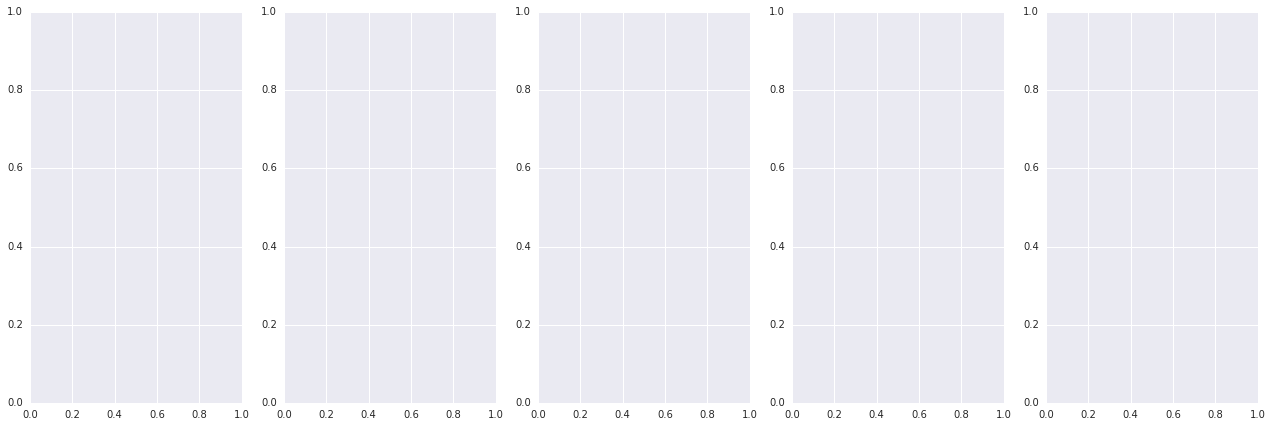

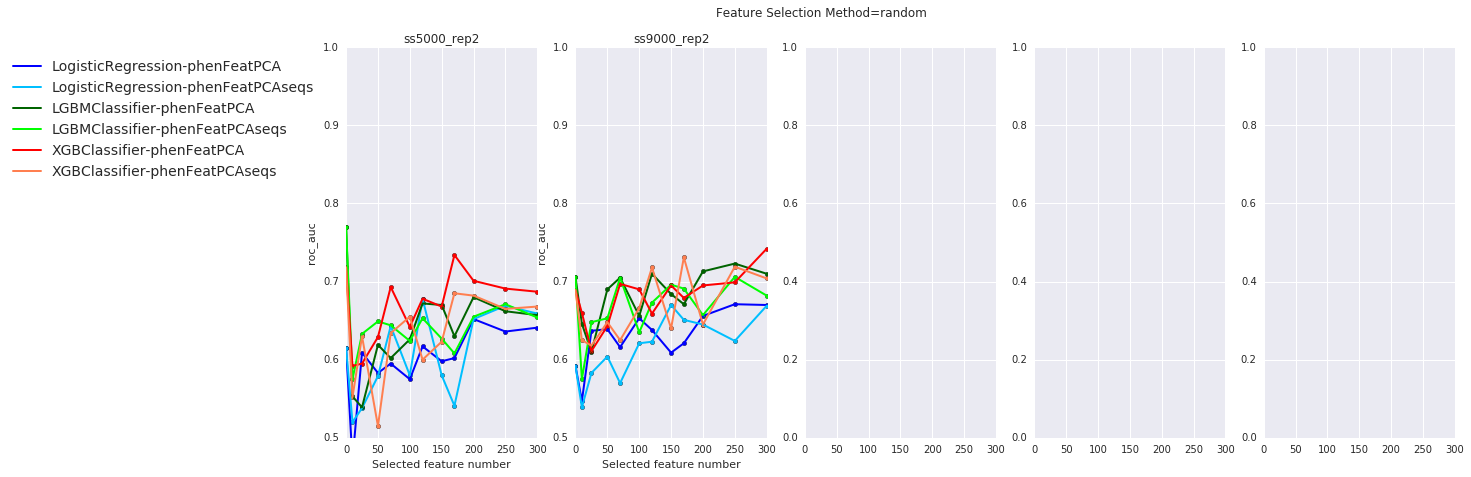

2
LogisticRegression
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
XGBClassifier
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LogisticRegression
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss9000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss9000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
random
random    110
Name: featureSelectionMethod, dtype: int

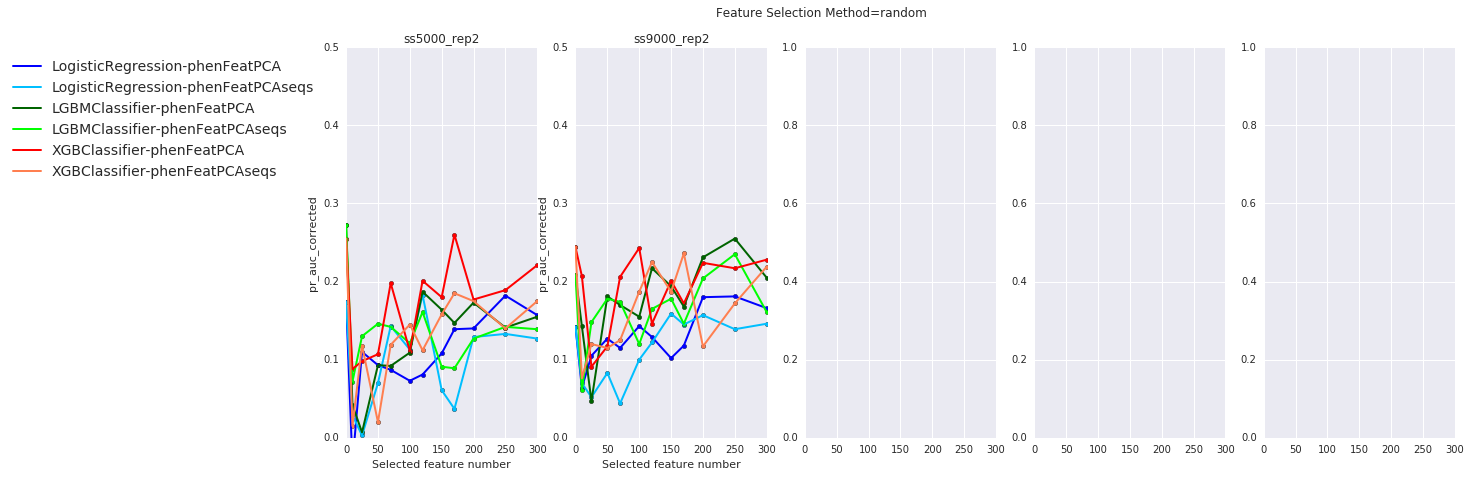

3
LogisticRegression
featureSelectionMethod
usingModel
Series([], Name: featureSelectionMethod, dtype: int64)
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
usingModel
usingModel    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
XGBClassifier
featureSelectionMethod
usingModel
usingModel    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LogisticRegression
featureSelectionMethod
usingModel
Series([], Name: featureSelectionMethod, dtype: int64)
true
0 MatchedSamples_ss9000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss9000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
usingModel
usingModel    110
Name: featur

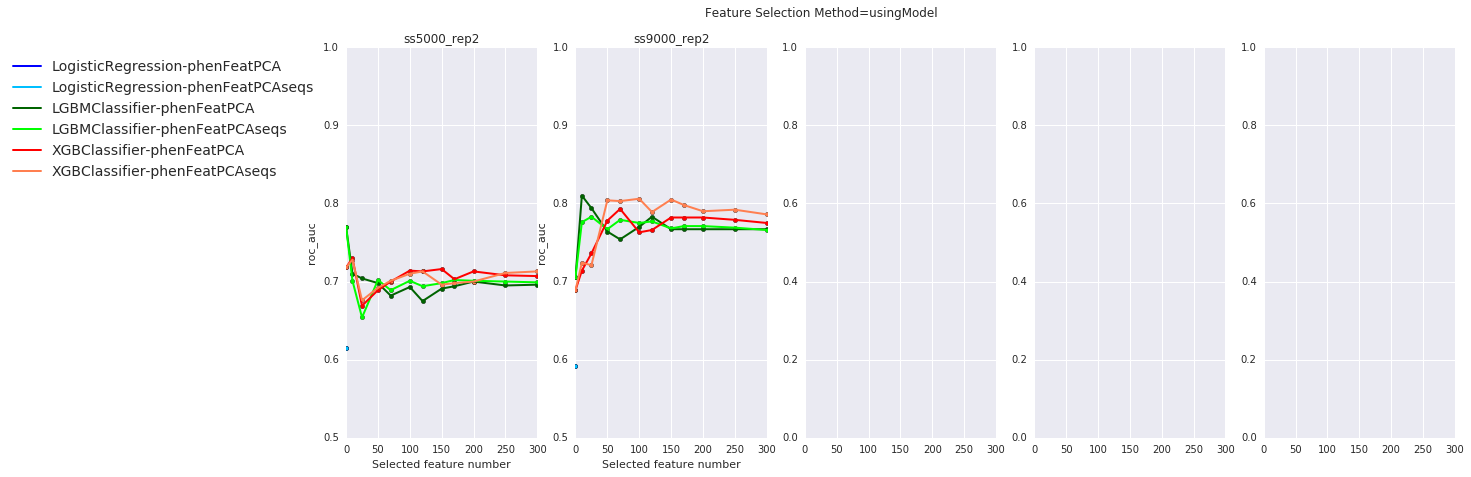

4
LogisticRegression
featureSelectionMethod
usingModel
Series([], Name: featureSelectionMethod, dtype: int64)
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
usingModel
usingModel    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
XGBClassifier
featureSelectionMethod
usingModel
usingModel    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LogisticRegression
featureSelectionMethod
usingModel
Series([], Name: featureSelectionMethod, dtype: int64)
true
0 MatchedSamples_ss9000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss9000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
usingModel
usingModel    110
Name: featur

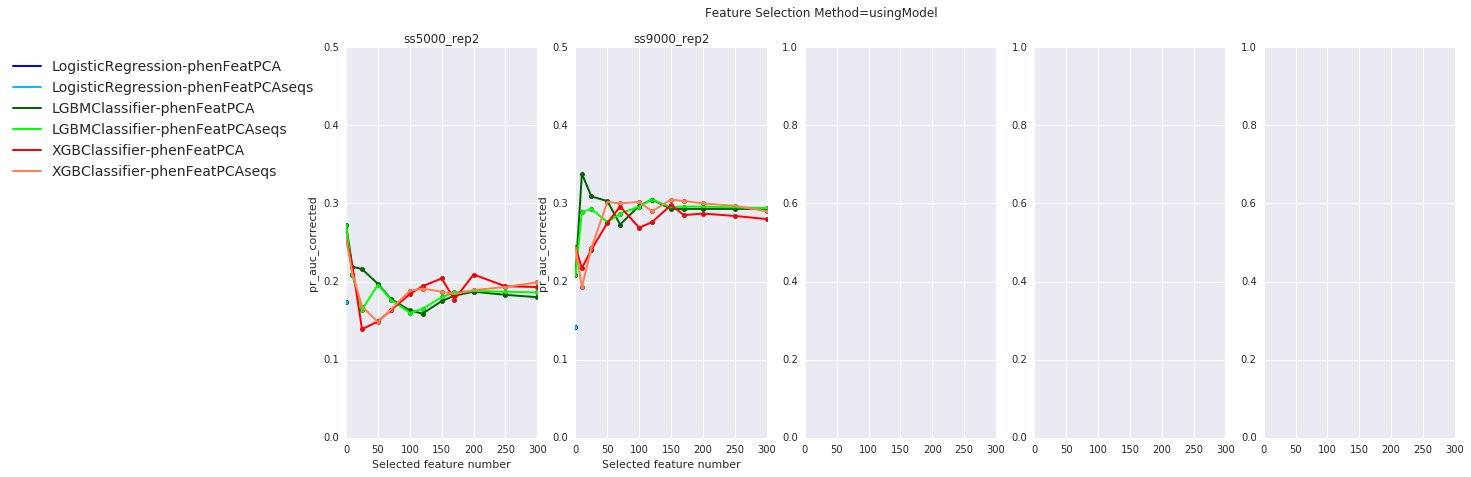

5
LogisticRegression
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
XGBClassifier
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LogisticRegression
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss9000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples

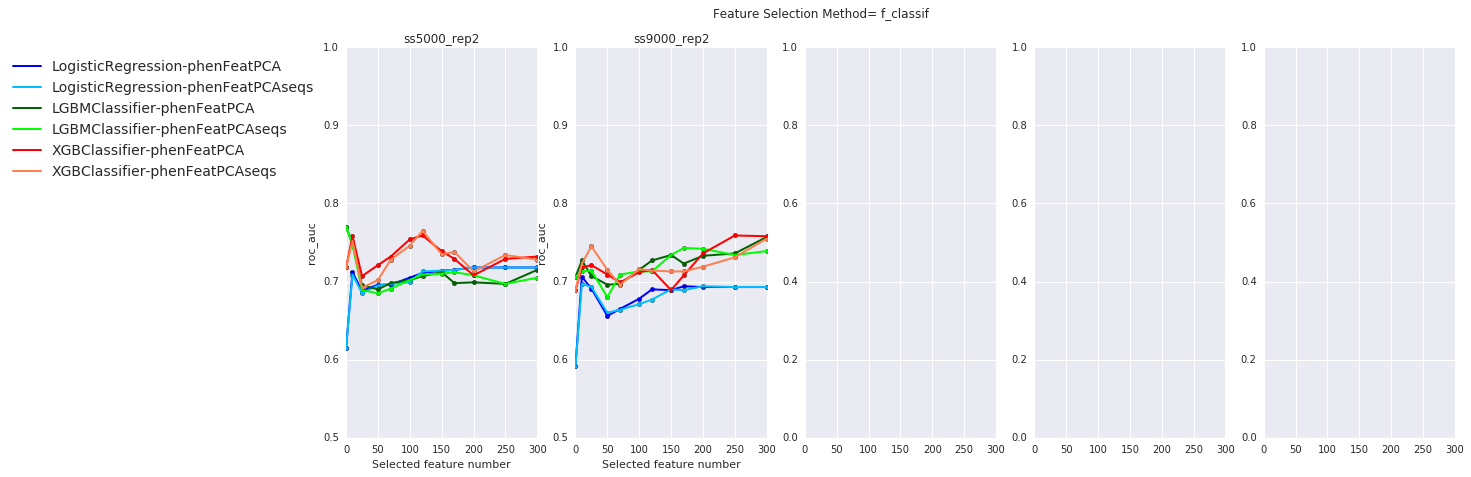

6
LogisticRegression
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LGBMClassifier
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
XGBClassifier
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss5000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples_ss5000rep2_phenotypes&TCRdf&PCA&TCRfeatures
LogisticRegression
featureSelectionMethod
 f_classif
<function f_classif at 0x7f6edbd1f2a8>    110
Name: featureSelectionMethod, dtype: int64
true
0 MatchedSamples_ss9000rep2_phenotypes&PCA&TCRfeatures
1 MatchedSamples

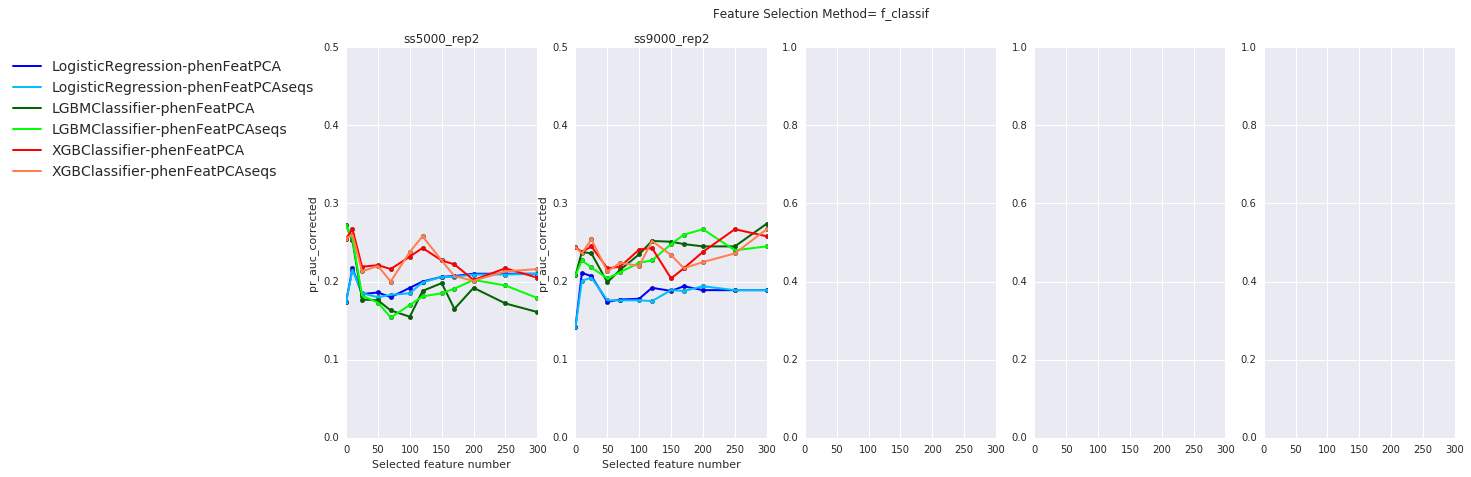

done


In [19]:

# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/newPredictions5' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.5,1)),('pr_auc_corrected',(0,0.5))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,axes=plt.subplots(nrows=1, ncols=5,figsize=(22,7),sharex=True)
        datasetList=[(5000,2),(9000,2)]
#          datasetList=[(5000,2),(9000,2),(12500,1),(12500,2),(15000,2)]
    #     
        print count
        count=count+1
        filterCrit=featureSelectionMethod
        for n,dataset in enumerate(datasetList):
            ax1=axes[n]
            ss=dataset[0]
            repeat=dataset[1]
            title='ss%s_rep%s' %(ss,repeat)
            ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                       xlim=(0,300),ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                      filterColumn=filterColumn,filterCrit=filterCrit)

    #         ss,repeat,colorList,dataColumn,ax,resultFolder=None,withTCRdf=True,title='',ylim=(0,1),xlim=(0,300),
    #                             filedate='14082018',YName='isCardio',datasetName=None):

            if n==0:    
                ax1.legend(fontsize=14,bbox_to_anchor=(-0.1, 1))
            else:
                ax1.legend('')
        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.2)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/isCardio_predictions' %resultFolder
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'


    
    

# plots for the full cohort

In [15]:
# modelNameList=['LGBMClassifier','XGBClassifier']
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/CardioSamples/Predictions2/isCardio_predictions/%s/predictionDFs' %(MyPath,modelName)
    results=concat_summarizing_dfs_excel(folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/TCR_real_data/CardioSamples/Predictions2/isCardio_predictions/%s/resultSummary_%s.xlsx' %(MyPath, modelName,cdate)
    results.to_excel(f1)
    results.head(20)

LogisticRegression
number of dfs in directory: 42
the length of df list is 42
LGBMClassifier
number of dfs in directory: 61
the length of df list is 61
XGBClassifier
number of dfs in directory: 60
the length of df list is 60


In [16]:

# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.5,1)),('pr_auc_corrected',(0,0.5))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,axes=plt.subplots(nrows=1, ncols=5,figsize=(22,7),sharex=True)
    #     
        print count
        count=count+1
        ax1=axes[n]
        ss=None
        repeat=None
        title='Full cohort_%s' %featureSelectionMethod
        ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                   xlim=(0,300),ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                  filterColumn=filterColumn,filterCrit=filterCrit)

#         ss,repeat,colorList,dataColumn,ax,resultFolder=None,withTCRdf=True,title='',ylim=(0,1),xlim=(0,300),
#                             filedate='14082018',YName='isCardio',datasetName=None):

        if n==0:    
            ax1.legend(fontsize=14,bbox_to_anchor=(-0.1, 1))
        else:
            ax1.legend('')
    fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
    fig.subplots_adjust(left=0.2)
    figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                    filterColumn,filterCrit,cdate)
    folder='%s/isCardio_predictions' %resultFolder
    figFile='%s/%s' %(folder,figName)
    fig.savefig(figFile,dpi=300)
    plt.show()
            
print 'done'


    
    

1
LogisticRegression


IndexError: single positional indexer is out-of-bounds

In [23]:
import HDF5
print HDF5.__version__


ImportError: No module named HDF5

In [25]:
import numpy as np
from pandas import HDFStore,DataFrame # create (or open) an hdf5 file and opens in append mode
hdf =HDFStore('storage.h5')